In [34]:
""" Let's first code up k = 1"""
from random import uniform
from math import log
from tqdm import tqdm
#inter-arrival times I ~ Exp(λ)
#λ, k, p_i
λ = 2
μ = 3
def gen_arrival():
    u = uniform(0,1)
    return -(1/λ)*log(u)

def gen_jobsize():
    u = uniform(0,1)
    return -(1/μ)*log(u)


''' Making transition to dropping system now: 1 server'''
def run():
    pis = [0] * 50
    counts = [0] * 50
    t = 0
    N = 0
    t_complete = float('inf')
    t_arrive = gen_arrival()
    arrivals = 0
    t_100k = 0
    to_depart = 1
    while True:
        #job completes next
        if t_complete < t_arrive:
            t += t_complete
            pis[N] += t_complete
            counts[N] += 1
            N -= 1
            if t_100k:
                to_depart -= 1
            if t_100k and not to_depart:
                # print(t,max(pis))
                # print(t,sum(pis),t_100k)
                return t-t_100k,N,[pi / (t) for pi in pis],counts
            t_arrive -= t_complete
            t_complete = gen_jobsize() if N > 0 else float('inf')
        #job arrives next
        else:
            t += t_arrive
            pis[N] += t_arrive
            counts[N] += 1
            N += 1
            t_complete -= t_arrive
            if N==1 and t_complete == float('inf'):
                t_complete = gen_jobsize()
            t_arrive = gen_arrival()
            arrivals += 1
            if arrivals == 10_000_000:
                t_100k = t
                to_depart = N
                # print('hey',t,t_100k,N)
ts,Ns = [],[]
n = 1
pi_true = []
counts_true = []
for _ in tqdm(range(n)):
    T,Nf,pis,counts = run()
    # print(f'T = {T}')
    ts.append(T)
    Ns.append(Nf)
    pi_true.append(pis)
    counts_true.append(counts)
    # print(pis)
avg_T, avg_N = sum(ts)/n, sum(Ns)/n
print(f'Average T of 100kth job: {avg_T}')
print(f'Average N at 100kth job: {avg_N}')
print(f'λT: {λ * avg_T}')
import numpy as np
pis = np.array(pi_true)
counts = np.array(counts_true)
final = np.mean(pis,axis=0)
final_counts = np.mean(counts,axis=0)
print(final)
for i in range(len(final) - 1):
    print(final[i+1]/final[i])
a = [final[i+1] / final[i] for i in range(len(final) - 1)]
a = [x for x in a if x > 0]
print(f'Average Ratio:{np.mean(a)}')
print(f'Counts: {final_counts}')


100%|██████████| 1/1 [00:08<00:00,  8.41s/it]

Average T of 100kth job: 1.1474890792742372
Average N at 100kth job: 2.0
λT: 2.2949781585484743
[3.33687870e-01 2.22511872e-01 1.48108496e-01 9.86428466e-02
 6.56991550e-02 4.38194819e-02 2.92778788e-02 1.95236237e-02
 1.29644920e-02 8.60788579e-03 5.74717699e-03 3.83743807e-03
 2.54560410e-03 1.71353868e-03 1.12332018e-03 7.37024399e-04
 4.93176515e-04 3.22996431e-04 2.12972259e-04 1.40909610e-04
 8.90515158e-05 5.47526893e-05 3.95361697e-05 2.72082362e-05
 2.05113496e-05 1.32965384e-05 9.48424384e-06 7.20615370e-06
 5.07698264e-06 4.39256000e-06 3.37744004e-06 2.79239574e-06
 1.96867033e-06 1.53635617e-06 7.56470086e-07 2.35916046e-07
 3.11280671e-07 1.30658032e-07 1.62616402e-08 5.40707959e-08
 3.40056948e-07 1.40170761e-07 6.40552620e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
0.6668263712498211
0.6656206481827986
0.6660174736124542
0.6660306075053252
0.66697177354656
0.6681475345847387
0.6668387373706812
0.6640412


/var/folders/cf/xxr0550s20j371tqcflz3qfc0000gn/T/ipykernel_74548/2396050643.py:82: RuntimeWarning: invalid value encountered in scalar divide
  print(final[i+1]/final[i])
/var/folders/cf/xxr0550s20j371tqcflz3qfc0000gn/T/ipykernel_74548/2396050643.py:83: RuntimeWarning: invalid value encountered in scalar divide
  a = [final[i+1] / final[i] for i in range(len(final) - 1)]


In [37]:
print(list(final_counts))
# print(final[-15:])

[3337980.0, 5560891.0, 3704221.0, 2467321.0, 1643251.0, 1096850.0, 732824.0, 487938.0, 324024.0, 215530.0, 143769.0, 95761.0, 63901.0, 42739.0, 28189.0, 18469.0, 12250.0, 8119.0, 5318.0, 3496.0, 2235.0, 1458.0, 1015.0, 718.0, 501.0, 316.0, 227.0, 167.0, 118.0, 98.0, 89.0, 65.0, 49.0, 45.0, 25.0, 10.0, 7.0, 3.0, 3.0, 4.0, 4.0, 3.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [4]:
import sys
sys.path.append('../')  # Adjust the relative path accordingly

from plot import Plot

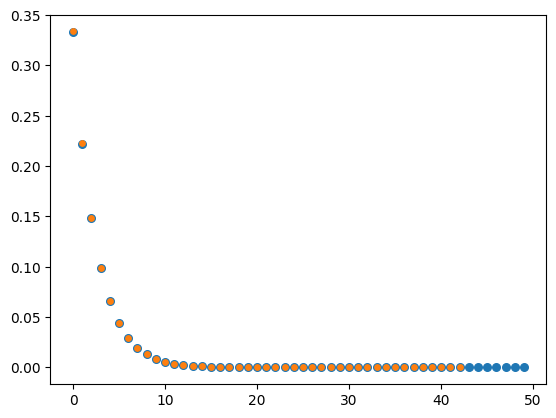

In [39]:
P = Plot()
from matplotlib import pyplot as plt
ρ = λ/μ
xs = list(range(len(final)))
data1 = [(1/3) * (ρ ** i) for i in range(len(final))]
plt.scatter(xs,data1,s=30)
f = [x for x in final if x > 0]
plt.scatter(list(range(len(f))),f,s=15)

^ Blue: expected, Orange: observed

In [3]:
!pip3 install sympy scipy

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 31.8 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [20]:

p = Plot()
ρ = λ/μ
print(ρ)
p.plotGeneric()

ModuleNotFoundError: No module named 'Plot'

In [19]:
import os
print(os.getcwd())

/Users/dolevartzi/PycharmProjects/probablyprobability/queueing


In [14]:
ys2 = [(2/3)**(i+1) for i in range(50)]
plt.show()

In [5]:
final[:5]

array([0.33343943, 0.22233761, 0.14818014, 0.09876589, 0.06583667])

In [52]:
a = [x for x in a if x > 0]
np.mean(a)

0.7553316317993051

In [ ]:
import numpy as np
x = np.array([[1,2,3],[4,5,6]])
np.mean(x,axis=0)

##### Dropping System, $k$ servers, $k$ types of jobs
- degenerate case: $k = 1$, $\mu_1 = \mu$
    - dropping system
    - we know from Problem 17.5 that $\pi_n = \frac{\rho}{n} \cdot C$
        - can use as a sanity check

In [ ]:
fun foo bar baz = 

In [ ]:
""" Let's first code up k = 1"""
from random import uniform
from math import log
from tqdm import tqdm
#inter-arrival times I ~ Exp(λ)
#λ, k, p_i
λ = 2
μ = 3
def gen_arrival():
    u = uniform(0,1)
    return -(1/λ)*log(u)

def gen_jobsize():
    u = uniform(0,1)
    return -(1/μ)*log(u)


''' Making transition to dropping system now: 1 server'''
def run():
    pis = [0] * 50
    t = 0
    N = 0
    t_complete = float('inf')
    t_arrive = gen_arrival()
    arrivals = 0
    t_100k = 0
    to_depart = 1
    while True:
        #job completes next
        if t_complete < t_arrive:
            t += t_complete
            pis[N] += t_complete
            N -= 1
            if t_100k:
                to_depart -= 1
            if t_100k and not to_depart:
                # print(t,max(pis))
                # print(t,sum(pis),t_100k)
                return t-t_100k,N,[pi / (t) for pi in pis]
            t_arrive -= t_complete
            t_complete = gen_jobsize() if N > 0 else float('inf')
        #job arrives next
        else:
            t += t_arrive
            pis[N] += t_arrive
            N += 1
            t_complete -= t_arrive
            if N==1 and t_complete == float('inf'):
                t_complete = gen_jobsize()
            t_arrive = gen_arrival()
            arrivals += 1
            if arrivals == 100_000:
                t_100k = t
                to_depart = N
                # print('hey',t,t_100k,N)
ts,Ns = [],[]
n = 1000
pi_true = []
for _ in tqdm(range(n)):
    T,Nf,pis = run()
    # print(f'T = {T}')
    ts.append(T)
    Ns.append(Nf)
    pi_true.append(pis)
    # print(pis)
avg_T, avg_N = sum(ts)/n, sum(Ns)/n
print(f'Average T of 100kth job: {avg_T}')
print(f'Average N at 100kth job: {avg_N}')
print(f'λT: {λ * avg_T}')
import numpy as np
pis = np.array(pi_true)
final = np.mean(pis,axis=0)
print(final)
for i in range(len(final) - 1):
    print(final[i+1]/final[i])
a = [final[i+1] / final[i] for i in range(len(final) - 1)]
a = [x for x in a if x > 0]
print(f'Average Ratio:{np.mean(a)}')


0 0
1 1
2 3
3 6
4 10
5 15
6 21
7 28
8 36
9 45


In [ ]:
E[N] = Sum_(all Zs) (reduce sum* Z) pi_Z

In [49]:
from math import floor

def N2(k):
    n = k + 1 + sum([k * floor((k - i)/2) for i in range(0,k+1)])
    print(n)
N2(2)

def N3(k):
    n = N2(2) + sum([]  )

#k = 1
0
1

#k = 2
0, (0,0)
1, (0,0)

#solo
0, (1,0)
0, (0,1)

2, (0,0)



#k = 3
0, (0,0), (0,0,0)
1, (0,0), (0,0,0)
0, (1,0), (0,0,0)
0, (0,1), (0,0,0)
2, (0,0), (0,0,0)

#3 new solo
0, (0,0), (1,0,0)
0, (0,0), (0,1,0)
0, (0,0), (0,0,1)

#2 new from n_1^1 = 1
1, (1,0), (0,0,0)
1, (0,1), (0,0,0)

3, (0,0), (0,0,0)


#k = 4
0, (0,0), (0,0,0), (0,0,0,0)
1, (0,0), (0,0,0), (0,0,0,0)
2, (0,0), (0,0,0), (0,0,0,0)
0, (1,0), (0,0,0), (0,0,0,0)
0, (0,1), (0,0,0), (0,0,0,0)
0, (0,0), (1,0,0), (0,0,0,0)
0, (0,0), (0,1,0), (0,0,0,0)
0, (0,0), (0,0,1), (0,0,0,0)
3, (0,0), (0,0,0), (0,0,0,0)
1, (1,0), (0,0,0), (0,0,0,0)
1, (0,1), (0,0,0), (0,0,0,0)

# 4 new solo 
0, (0,0), (0,0,0), (1,0,0,0)
0, (0,0), (0,0,0), (0,1,0,0)
0, (0,0), (0,0,0), (0,0,1,0)
0, (0,0), (0,0,0), (0,0,0,1)

# 3 new from n_1^1 = 1
1, (0,0), (1,0,0), (0,0,0,0)
1, (0,0), (0,1,0), (0,0,0,0)
1, (0,0), (0,0,1), (0,0,0,0)

# 3 new from 2's. 
0, (2,0), (0,0,0), (0,0,0,0)
0, (1,1), (0,0,0), (0,0,0,0)
0, (0,2), (0,0,0), (0,0,0,0)

# 2 
2, (1,0),     2,(0,1)

4, (0,0), (0,0,0), (0,0,0,0)

#k = 5
0, (0,0), (0,0,0), (0,0,0,0), (0,0,0,0,0)
1, (0,0), (0,0,0), (0,0,0,0), (0,0,0,0,0)
2, (0,0), (0,0,0), (0,0,0,0), (0,0,0,0,0)
0, (1,0), (0,0,0), (0,0,0,0), (0,0,0,0,0)
0, (0,1), (0,0,0), (0,0,0,0), (0,0,0,0,0)
0, (0,0), (1,0,0), (0,0,0,0), (0,0,0,0,0)
0, (0,0), (0,1,0), (0,0,0,0), (0,0,0,0,0)
0, (0,0), (0,0,1), (0,0,0,0), (0,0,0,0,0)
3, (0,0), (0,0,0), (0,0,0,0), (0,0,0,0,0)
1, (1,0), (0,0,0), (0,0,0,0), (0,0,0,0,0)
1, (0,1), (0,0,0), (0,0,0,0), (0,0,0,0,0)
0, (0,0), (0,0,0), (1,0,0,0), (0,0,0,0,0)
0, (0,0), (0,0,0), (0,1,0,0), (0,0,0,0,0)
0, (0,0), (0,0,0), (0,0,1,0), (0,0,0,0,0)
0, (0,0), (0,0,0), (0,0,0,1), (0,0,0,0,0)
1, (0,0), (1,0,0), (0,0,0,0), (0,0,0,0,0)
1, (0,0), (0,1,0), (0,0,0,0), (0,0,0,0,0)
1, (0,0), (0,0,1), (0,0,0,0), (0,0,0,0,0)
0, (2,0), (0,0,0), (0,0,0,0), (0,0,0,0,0)
0, (1,1), (0,0,0), (0,0,0,0), (0,0,0,0,0)
0, (0,2), (0,0,0), (0,0,0,0), (0,0,0,0,0)
4, (0,0), (0,0,0), (0,0,0,0), (0,0,0,0,0)

#solo
0, (0,0), (0,0,0), (0,0,0,0), (1,0,0,0,0)
0, (0,0), (0,0,0), (0,0,0,0), (0,1,0,0,0)
0, (0,0), (0,0,0), (0,0,0,0), (0,0,1,0,0)
0, (0,0), (0,0,0), (0,0,0,0), (0,0,0,1,0)
0, (0,0), (0,0,0), (0,0,0,0), (0,0,0,0,1)

# 4 new from n_1^1 = 1
1, (0,0), (0,0,0), (1,0,0,0), (0,0,0,0,0)
1, (0,0), (0,0,0), (0,1,0,0), (0,0,0,0,0)
1, (0,0), (0,0,0), (0,0,1,0), (0,0,0,0,0)
1, (0,0), (0,0,0), (0,0,0,1), (0,0,0,0,0)

#3 new from n_1^1 = 2 

#2 new from n_1^1 = 3

#6 new from n_2 = 1 and n_3 = 1

#1 new from n_1 = 5



N_1 = k + 1


5


(0, (0, 1))

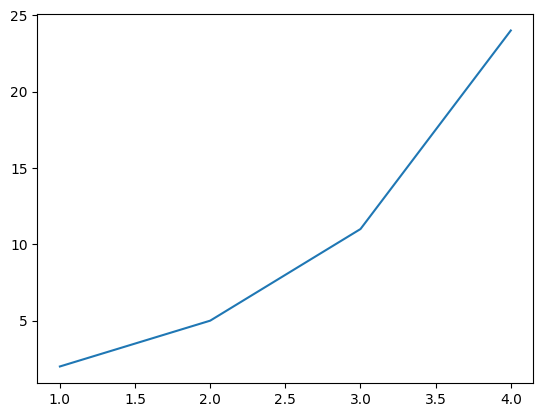

In [53]:
from matplotlib import pyplot as plt
plt.plot([1,2,3,4],[2,5,11,24])


In [ ]:
k = 4

![image](imgQ.png)

In [57]:
import math
n = 4
def coeff(p):
    s = 0
    for i in range(0,math.floor(n)):
        if n - (n-1)*i > 0:
            s += (-1)**i * math.comb(n - (n - 1) * i,i)
    print(s)
p = 4
coeff(p)

0


In [59]:
!pip3 install sympy

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [67]:
from sympy.solvers.diophantine import diophantine
from sympy import symbols

a, b, c = symbols ( 'a, b, c', Integer = True )
x = diophantine ( a + 2*b + 3*c = 3 = 0)
print(x,len(x))



set() 0


In [71]:
from sympy.solvers.diophantine.diophantine import diop_linear
# from sympy.abc import x, y, z
a, b, c = symbols ( 'a, b, c', Integer = True )
diop_linear(a + 2*b + 3* c- 5) # solves equation 2*x - 3*y - 5 == 0

(t_0, 4*t_0 + 3*t_1 - 5, -3*t_0 - 2*t_1 + 5)

In [198]:
from tqdm import tqdm
a__ = [1, 1, 2, 3, 5, 7, 11, 15, 22, 30]
def N(k):
    s = 0
    s1 = 0
    for a1 in range(k+1):
        for a2 in range(k+1):
            for a3 in range(k+1):
                for a4 in range(k+1):
                    for a5 in range(k+1):
                        for a6 in range(k+1):
                            for a7 in range(k+1):
                                for a8 in range(k+1):
                                    for a9 in range(k+1):
                                        # for a10 in range(k+1):
                                        #     for a11 in range(k+1):
                                        #         for a12 in range(k+1):
                                                    # a10,a11,a12 = 0,0,0
                                                    if (a1 + 2 * a2 + 3 * a3 + 4 * a4 + 5 * a5 + 6 * a6 + 7 * a7 + 8 * a8 + 9 * a9) <= k and 0 <= a1 <= k and 0 <= a2 <= math.floor(k / 2) and 0 <= a3 <= math.floor(k / 3) and 0 <= a4 <= math.floor(k / 4) and 0 <= a5 <= math.floor(k / 5) and 0 <= a6 <= math.floor(k / 6) and 0 <= a7 <= math.floor(k/7) and 0 <= a8 <= math.floor(k / 8) and 0 <= a9 <= math.floor(k / 9):
                                                        s += 1
                                                        _as = [0,a1,a2,a3,a4,a5,a6,a7,a8,a9]
                                                        m = {i:_as[i] for i in range(len(_as))}
                                                        # pos = [i for i in range ]
                                                        pos = [i for i in range(len(_as)) if i > 1 and _as[i] > 0]
                                                        p = 1
                                                        for i in pos:
                                                            p *= math.comb(_as[i] + i - 1,i - 1)
                                                        s1 += p
                    
    print(k,s,s1)
for i in (range(0,13)):
    N(i)

0 1 1
1 2 2
2 4 5
3 7 11
4 12 24
5 19 48
6 30 96
7 45 182
8 67 342
9 97 624


KeyboardInterrupt: 

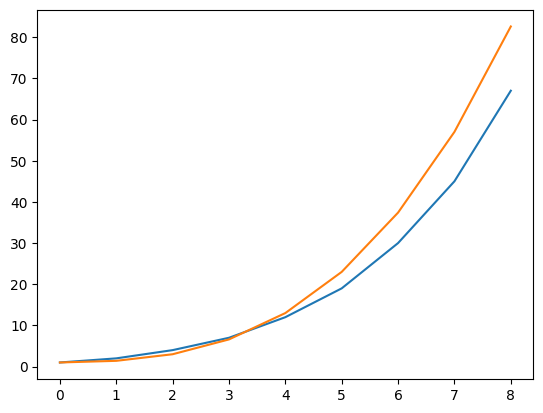

In [97]:
xs = list(range(9))
ys = [1,2,4,7,12,19,30,45,67]

plt.plot(xs,ys)
xs2 = []
xs2.append(1)
for i in range(1,9):
    xs2.append(xs2[-1] + xs[-1] * i ** 2 / 20)
plt.plot(xs,xs2)


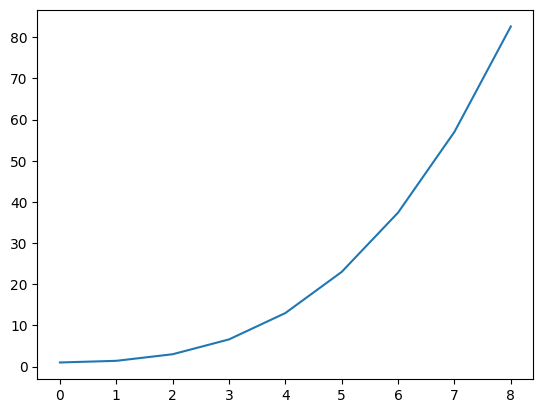

In [96]:
plt.plot(xs,xs2)

In [98]:
def run(k):
    t = 0
    N = 0
    t_complete = float('inf')
    t_arrive = gen_arrival()
    arrivals = 0
    t_100k = 0
    to_depart = 1
    D = []
    for i in range(1,k+1):
        D.append([0] * i)
    while True:
        #job completes next
        if t_complete < t_arrive:
            t += t_complete
            N -= 1
            if t_100k:
                to_depart -= 1
            if t_100k and not to_depart:
                return t-t_100k,N
            t_arrive -= t_complete
            t_complete = gen_jobsize() if N > 0 else float('inf')
        #job arrives next
        else:
            t += t_arrive
            N += 1
            t_complete -= t_arrive
            if N==1 and t_complete == float('inf'):
                t_complete = gen_jobsize()
            t_arrive = gen_arrival()
            arrivals += 1
            if arrivals == 100_000:
                t_100k = t
                to_depart = N
import multiprocessing
ts,Ns = [],[]
n = 10000
for _ in tqdm(range(n)):
    T,Nf = run()
    ts.append(T)
    Ns.append(Nf)
avg_T, avg_N = sum(ts)/n, sum(Ns)/n
print(f'Average T of 100kth job: {avg_T}')
print(f'Average N at 100kth job: {avg_N}')
print(f'λT: {λ * avg_T}')

  0%|          | 0/10000 [00:00<?, ?it/s]


TypeError: run() missing 1 required positional argument: 'k'

In [103]:
D = []
k = 3
for i in range(1,k+1):
    D.append([0] * i)
D

[[0], [0, 0], [0, 0, 0]]

In [102]:
D[1][0] += 1
D

[[0], [2, 0], [0, 0, 0]]

In [138]:
ys = [1,2,4,7,12,19,30,45,67]
def solve_diophantine(target, k):
    dp = [[0] * (k + 1) for _ in range(target + 1)]

    # Base case: there is one way to achieve a sum of 0 for any k (no terms used)
    for j in range(1, k + 1):
        dp[0][j] = 1

    for i in range(1, target + 1):
        for j in range(1, k + 1):
            dp[i][j] = dp[i][j - 1]
            if i - j >= 0:
                dp[i][j] += dp[i - j][j]
    # print(dp[target-1][k])
    return dp[target][k]# + dp[target-1][k]

# Example usage:
for n in range(1,9):
    target_sum = n
    num_terms = n
    result = solve_diophantine(target_sum, num_terms)
    print(n,result)

1 1
2 2
3 3
4 5
5 7
6 11
7 15
8 22


In [168]:
def solve_diophantine(target, k):
    dp = [[0] * (k + 1) for _ in range(target + 1)]

    # Base case: there is one way to achieve a sum of 0 for any k (no terms used)
    for j in range(1, k + 1):
        dp[0][j] = 1

    for i in range(1, target + 1):
        for j in range(1, k + 1):
            dp[i][j] = dp[i][j - 1]
            if i - j >= 0:
                dp[i][j] += dp[i - j][j]

    return dp[target][k]

n0 = 1
n_new = 0
stri = ''
rstri = ''
for n in range(0,30):
    target_sum = n
    num_terms = n
    result = solve_diophantine(target_sum, num_terms)
    n_new = result + n0
    n0 = n_new
    str(n_new)
    rstri = rstri + ' ' + str(result)
    stri = stri + ' ' + str(n_new)
stri

' 1 2 4 7 12 19 30 45 67 97 139 195 272 373 508 684 915 1212 1597 2087 2714 3506 4508 5763 7338 9296 11732 14742 18460 23025'

In [169]:
rstri

' 0 1 2 3 5 7 11 15 22 30 42 56 77 101 135 176 231 297 385 490 627 792 1002 1255 1575 1958 2436 3010 3718 4565'

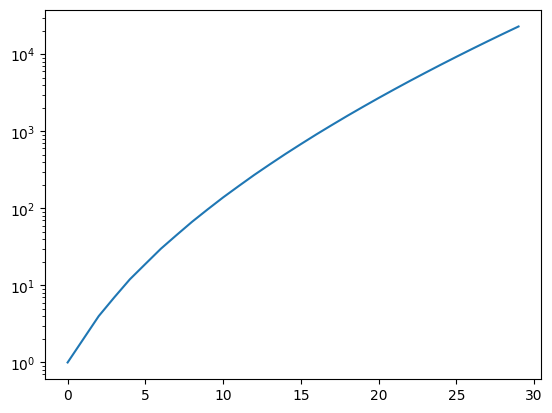

In [180]:
xs = list(range(30))

n0 = 1
n_new = 0
ys = [n0]
for n in range(1,30):
    target_sum = n
    num_terms = n
    result = solve_diophantine(target_sum, num_terms)
    n_new = result + n0
    n0 = n_new
    # print(n,n_new)
    ys.append(n_new)

# plt.plot(xs,ys)
plt.semilogy(xs,ys)
plt.show()
# plt.semilogy(xs,ys)
# xs2 = []
# xs2.append(1)
# for i in range(1,30):
#     xs2.append(xs2[-1] + xs[-1] * i ** 2 / 25)
# plt.plot(xs,xs2)


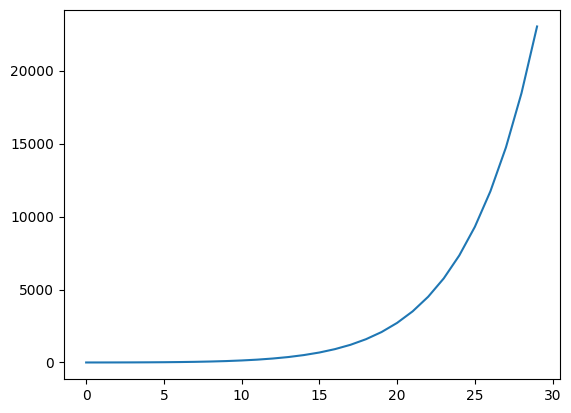

In [157]:
plt.plot(xs,ys)


In [181]:
def getSeq(s):
    f = s
    f = f.split(', ')
    f = [int(x) for x in f]
    return f

a70seq = '''1, 2, 4, 7, 12, 19, 30, 45, 67, 97, 139, 195, 272, 373, 508, 684, 915, 1212, 1597, 2087, 2714, 3506, 4508, 5763, 7338, 9296, 11732, 14742, 18460, 23025, 28629, 35471, 43820, 53963, 66273, 81156, 99133, 120770, 146785, 177970, 215308, 259891, 313065, 376326, 451501'''
A70 = getSeq(a70seq)
a41seq = '''1, 1, 2, 3, 5, 7, 11, 15, 22, 30, 42, 56, 77, 101, 135, 176, 231, 297, 385, 490, 627, 792, 1002, 1255, 1575, 1958, 2436, 3010, 3718, 4565, 5604, 6842, 8349, 10143, 12310, 14883, 17977, 21637, 26015, 31185, 37338, 44583, 53174, 63261, 75175, 89134, 105558, 124754'''
A41 = getSeq(a41seq)
Z = [A70[i] - A41[i] for i in range(30)]
for i in range(30):
    print(f'A70 = {A70[i]}, A41 = {A41[i]} Z = {Z[i]}  y_new = {ys[i]}')


A70 = 1, A41 = 1 Z = 0  y_new = 1
A70 = 2, A41 = 1 Z = 1  y_new = 2
A70 = 4, A41 = 2 Z = 2  y_new = 4
A70 = 7, A41 = 3 Z = 4  y_new = 7
A70 = 12, A41 = 5 Z = 7  y_new = 12
A70 = 19, A41 = 7 Z = 12  y_new = 19
A70 = 30, A41 = 11 Z = 19  y_new = 30
A70 = 45, A41 = 15 Z = 30  y_new = 45
A70 = 67, A41 = 22 Z = 45  y_new = 67
A70 = 97, A41 = 30 Z = 67  y_new = 97
A70 = 139, A41 = 42 Z = 97  y_new = 139
A70 = 195, A41 = 56 Z = 139  y_new = 195
A70 = 272, A41 = 77 Z = 195  y_new = 272
A70 = 373, A41 = 101 Z = 272  y_new = 373
A70 = 508, A41 = 135 Z = 373  y_new = 508
A70 = 684, A41 = 176 Z = 508  y_new = 684
A70 = 915, A41 = 231 Z = 684  y_new = 915
A70 = 1212, A41 = 297 Z = 915  y_new = 1212
A70 = 1597, A41 = 385 Z = 1212  y_new = 1597
A70 = 2087, A41 = 490 Z = 1597  y_new = 2087
A70 = 2714, A41 = 627 Z = 2087  y_new = 2714
A70 = 3506, A41 = 792 Z = 2714  y_new = 3506
A70 = 4508, A41 = 1002 Z = 3506  y_new = 4508
A70 = 5763, A41 = 1255 Z = 4508  y_new = 5763
A70 = 7338, A41 = 1575 Z = 5763  

In [186]:
A41[:10]

[1, 1, 2, 3, 5, 7, 11, 15, 22, 30]